# ECG Classification

## Paper: [ECG Heartbeat Classification: A Deep Transferable Representation](https://arxiv.org/pdf/1805.00794.pdf)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
df = pd.read_csv("/Users/Usuario/Documents/Python Scripts/F2/database/mitbih_train.csv", header=None)
df2 = pd.read_csv("/Users/Usuario/Documents/Python Scripts/F2/database/mitbih_test.csv", header=None)
df = pd.concat([df, df2], axis=0)

### show one data

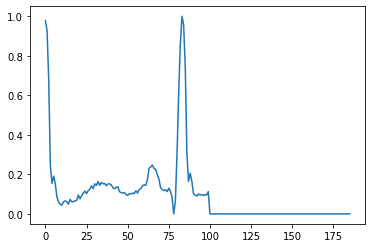

In [6]:
plt.plot(df.iloc[0,:186])

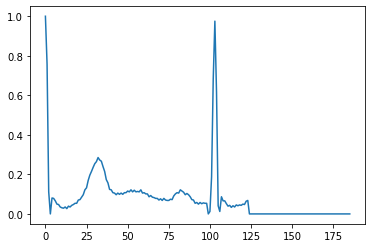

In [7]:
plt.plot(df2.iloc[0,:186])

## Dataset Equilibre

In [8]:
# plot the circle of value counts in dataset
def plot_equilibre(equilibre):
    plt.figure(figsize=(10,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64


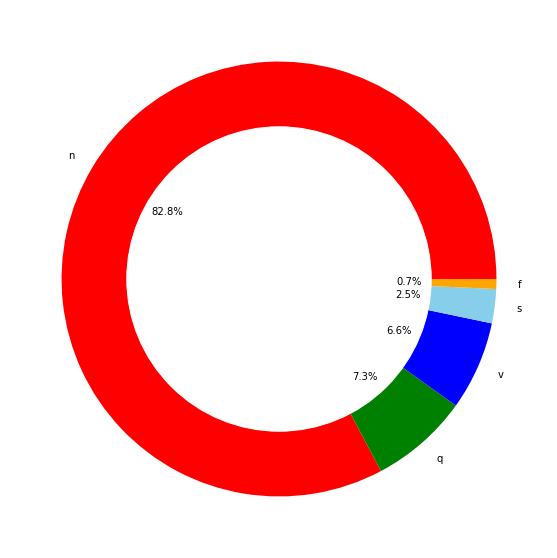

In [9]:
print(df[187].value_counts())

plot_equilibre(df[187].value_counts())

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


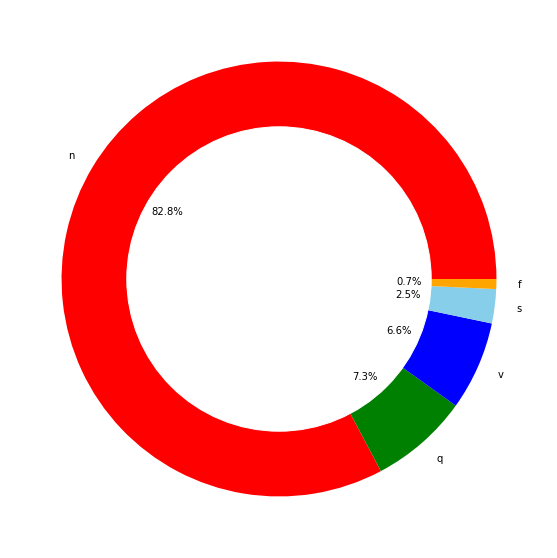

In [10]:
print(df2[187].value_counts())

plot_equilibre(df2[187].value_counts())

## Prepare Dataset

In [11]:
X_train = df.values[:, :-1]
y_train = df.values[:, -1].astype(int)

X_test  = df2.values[:, :-1]
y_test  = df2.values[:, -1].astype(int)

### show data

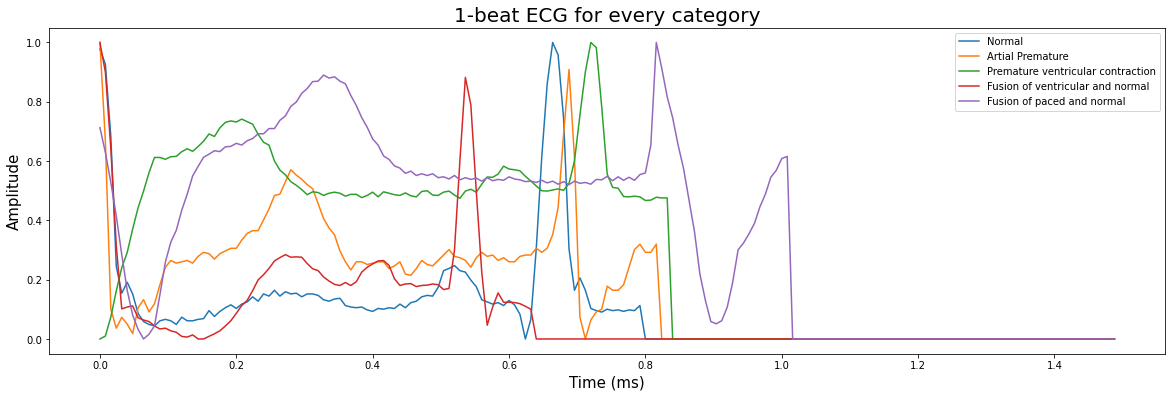

In [12]:
# plot one ECG for each category
C0 = np.argwhere(y_train == 0).flatten()
C1 = np.argwhere(y_train == 1).flatten()
C2 = np.argwhere(y_train == 2).flatten()
C3 = np.argwhere(y_train == 3).flatten()
C4 = np.argwhere(y_train == 4).flatten()

x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,6))
plt.plot(x, X_train[C0, :][0], label="Normal")
plt.plot(x, X_train[C1, :][0], label="Artial Premature")
plt.plot(x, X_train[C2, :][0], label="Premature ventricular contraction")
plt.plot(x, X_train[C3, :][0], label="Fusion of ventricular and normal")
plt.plot(x, X_train[C4, :][0], label="Fusion of paced and normal")
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

In [13]:
X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)

print(X_train.shape)
print(X_test.shape)

(109446, 187, 1)
(21892, 187, 1)


In [16]:
from keras import utils
y_train = utils.to_categorical(y_train)
y_test  = utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(109446, 5, 2)
(21892, 5, 2)


## Build Model

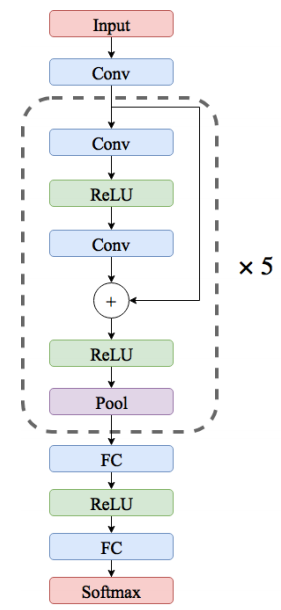

In [22]:
n_obs, feature, depth = X_train.shape
num_classes= 5

In [24]:
# Build Model
from keras import models, layers, optimizers, callbacks

inputs = layers.Input(shape=(feature,depth))
C   = layers.Conv1D(filters=32, kernel_size=5, strides=1)(inputs)

C11 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = layers.Activation("relu")(C11)
C12 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = layers.Add()([C12, C])
A12 = layers.Activation("relu")(S11)
M11 = layers.MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = layers.Activation("relu")(C21)
C22 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = layers.Add()([C22, M11])
A22 = layers.Activation("relu")(S21)
M21 = layers.MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = layers.Activation("relu")(C31)
C32 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = layers.Add()([C32, M21])
A32 = layers.Activation("relu")(S31)
M31 = layers.MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = layers.Activation("relu")(C41)
C42 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = layers.Add()([C42, M31])
A42 = layers.Activation("relu")(S41)
M41 = layers.MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = layers.Activation("relu")(C51)
C52 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = layers.Add()([C52, M41])
A52 = layers.Activation("relu")(S51)
M51 = layers.MaxPooling1D(pool_size=5, strides=2)(A52)

F1  = layers.Flatten()(M51)

D1  = layers.Dense(32)(F1)
A6  = layers.Activation("relu")(D1)
D2  = layers.Dense(32)(A6)

outputs = layers.Dense(num_classes, activation="softmax")(D2)

model = models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 conv1d_22 (Conv1D)             (None, 183, 32)      192         ['input_3[0][0]']                
                                                                                                  
 conv1d_23 (Conv1D)             (None, 183, 32)      5152        ['conv1d_22[0][0]']              
                                                                                                  
 activation_22 (Activation)     (None, 183, 32)      0           ['conv1d_23[0][0]']              
                                                                                            

In [25]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [26]:
batch_size = 100
num_epochs = 10 

In [27]:
# Train Model
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: in user code:

    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\Usuario\anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5, 2) and (None, 5) are incompatible


## Save Model

In [ ]:
# Save Model
models.save_model(model, 'ecg_arrhythmia.hdf5')

## Test Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

labels = ["Normal",
          "Artial Premature",
          "Premature ventricular contraction",
          "Fusion of ventricular and normal",
          "Fusion of paced and normal"]

In [ ]:
# Test Model
predY = model.predict(X_test)
y_pred = np.argmax(predY,axis=1)
y_actual = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_actual, y_pred)
print(cm)

In [ ]:
print(classification_report(y_actual, y_pred, target_names=labels))